In [10]:
import numpy as np
import matplotlib.pyplot as plt       

In [11]:
#input data    
X = np.array([[0,0], [0,1], [1,0], [1,1]])

#targets

t_and = np.array([0, 0, 0, 1])
t_or= np.array([0, 1, 1, 1])
t_nand= np.array([1, 1, 1, 0])
t_nor= np.array([1, 0, 0, 0])
t_xor= np.array([0, 1, 1, 0])

In [12]:
#activation function.
def sigmoid(x):
    return 1/(1+np.exp(-x))


#first derivative of the activation function.
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))


In [13]:
# Implementing the perceptron.
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
    
        # Initialize random weights and a random bias 
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        #learning rate as 1.
        self.alpha = 1
        
        # We initialize variables to store input and drive of a neuron 
        self.inputs = 0
        self.drive = 0
        
    def forward_step(self, inputs):
        self.inputs = inputs
        
       # Perform a perceptron forward step.
        # 1. calculating the drive as sum of weights*inputs + bias 
        self.drive = self.weights @ inputs + self.bias
        # Return the activation.
        return sigmoid(self.drive)
        
    def update(self, delta):
        #Performing the updates 
        
        # 1.Compute the gradients for weights and bias.
        gradient_weights = delta * self.inputs
        gradient_bias = delta
        
        # Update weights and bias.
        self.weights -=  self.alpha * gradient_weights
        self.bias -= self.alpha * gradient_bias

In [14]:
# Implementing the multi-layer perceptron.

class MLP:
    
    def __init__(self):
        #we initialize the perceptrons for the hidden layer with 4 neurons.
        self.hidden_layer = [
            Perceptron(input_units=2),
            Perceptron(input_units=2),
            Perceptron(input_units=2),
            Perceptron(input_units=2)
        ]
        
        # Initializing the output neuron.
        self.output_neuron = Perceptron(input_units=4)
        self.output = 0
        
    def forward_step(self, inputs):
        
        # Compute the activations for the hidden layer.
        activations_hidden = np.array([neuron.forward_step(inputs) for neuron in self.hidden_layer])
        activations_hidden = np.reshape(activations_hidden, newshape=(-1))
        
        # Compute the activation of the output neuron and store it in 'self.output'.
        self.output = self.output_neuron.forward_step(activations_hidden)
        
    def backprop_step(self, inputs, target):
        
        # Compute the delta at the output neuron.
        output_delta = - (target - self.output) * sigmoid_derivative(self.output_neuron.drive)
        # Update the parameters of  the output neuron.
        self.output_neuron.update(output_delta)
        # Compute the deltas for the hidden neurons.
        hidden_deltas = [output_delta * sigmoid_derivative(neuron.drive) * self.output_neuron.weights[i] for i, neuron in enumerate(self.hidden_layer)]
        # Update the parameters for all four neurons in the hidden layer.
        for i,neuron in enumerate(self.hidden_layer):
            neuron.update(hidden_deltas[i])


In [15]:
# Train the MLP
# Initialize the MLP.
mlp = MLP()
# Initialize lists to store epochs, loss, accuracy.
epochs=[]
losses=[]
accuracies=[]

for epoch in range(1000):
    epochs.append(epoch)
    
    accuracy = 0
    loss = 0
    
    # Training loop.
    for i in range(len(X)):
        x = X[i]
        t = t_xor[i]
    
        # forward step with the given sample.
        mlp.forward_step(x)
        # backpropagation step with the given sample and target.
        mlp.backprop_step(x,t)
        
        accuracy += int(float(mlp.output>=0.5) == t)
        loss += (t-mlp.output)**2
        
    accuracies.append(accuracy/4.0)
    losses.append(loss)

<IPython.core.display.Javascript object>


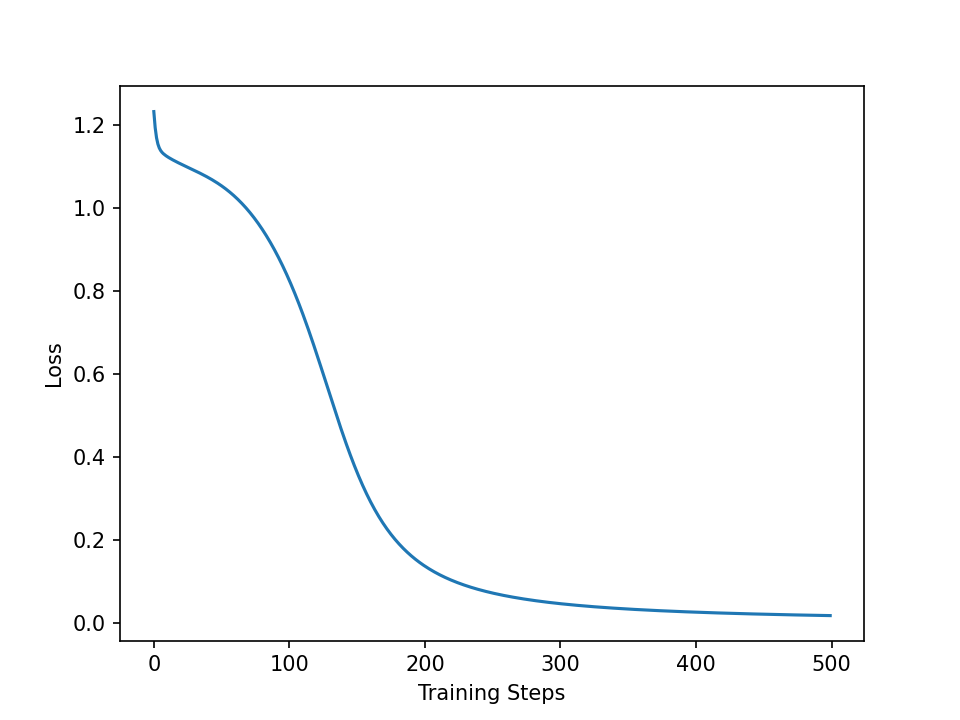

<IPython.core.display.Javascript object>


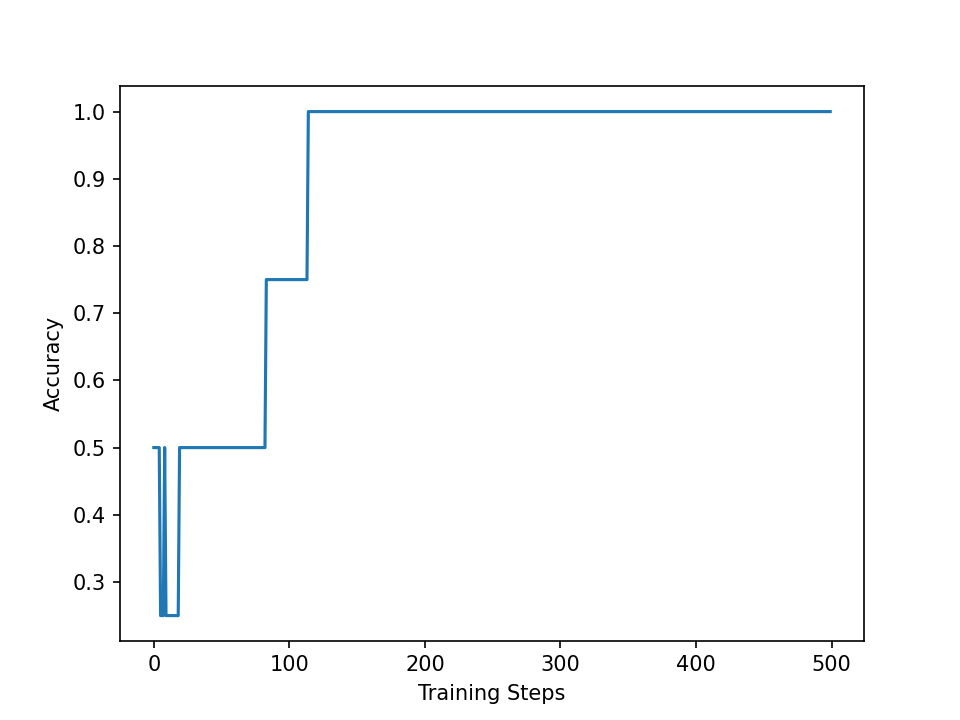

In [16]:

# Visualize the training progress.
plt.figure()
plt.plot(epochs,losses)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs,accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()